Features shape: (442, 10)
Target shape: (442,)


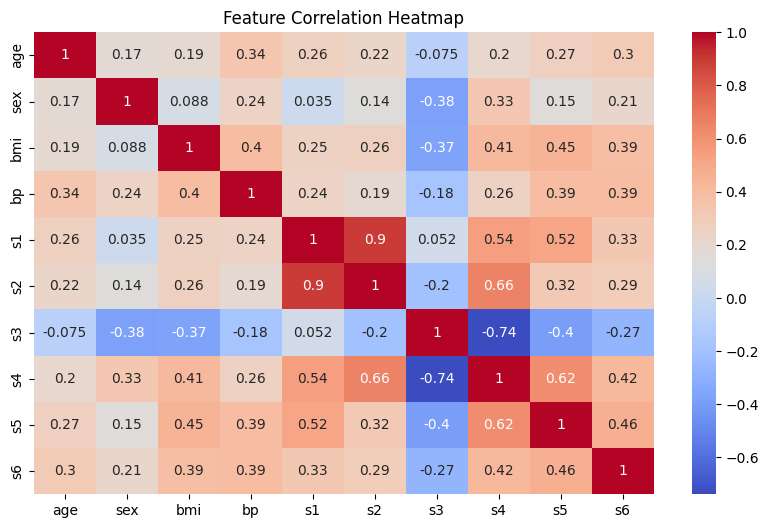

Simple Linear Regression:
 MAE = 52.26, MSE = 4061.83, RMSE = 63.73, R² = 0.23



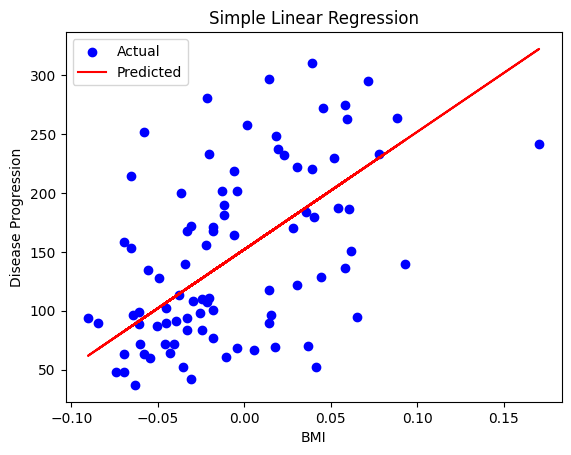

Multiple Linear Regression:
 MAE = 42.79, MSE = 2900.19, RMSE = 53.85, R² = 0.45



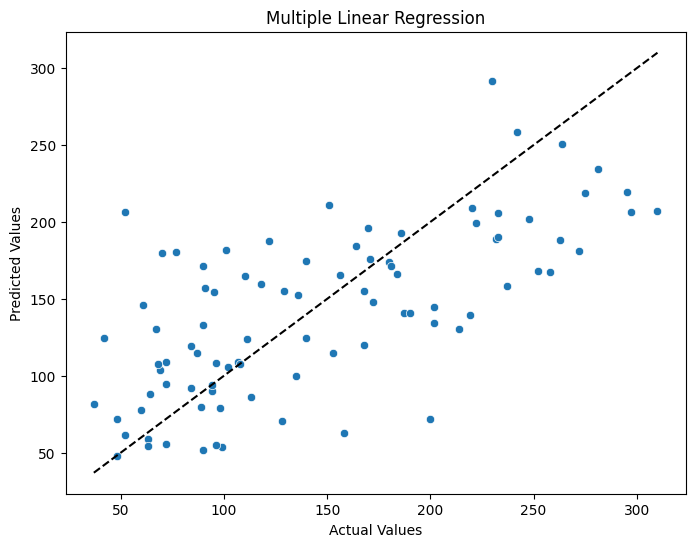

Polynomial Regression (Degree 2):
 MAE = 52.38, MSE = 4085.03, RMSE = 63.91, R² = 0.23



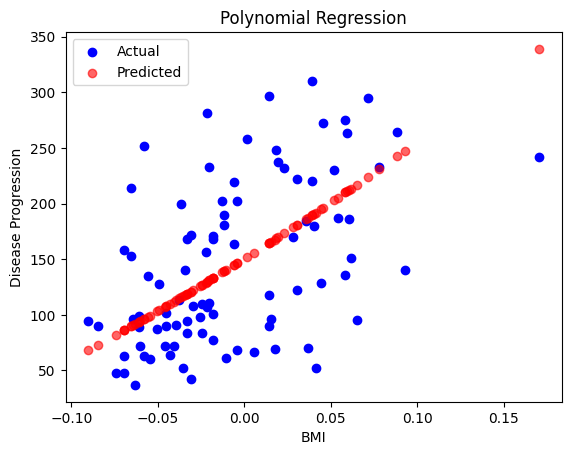

Ridge Regression:
 MAE = 42.81, MSE = 2892.03, RMSE = 53.78, R² = 0.45

Lasso Regression:
 MAE = 42.80, MSE = 2884.55, RMSE = 53.71, R² = 0.46



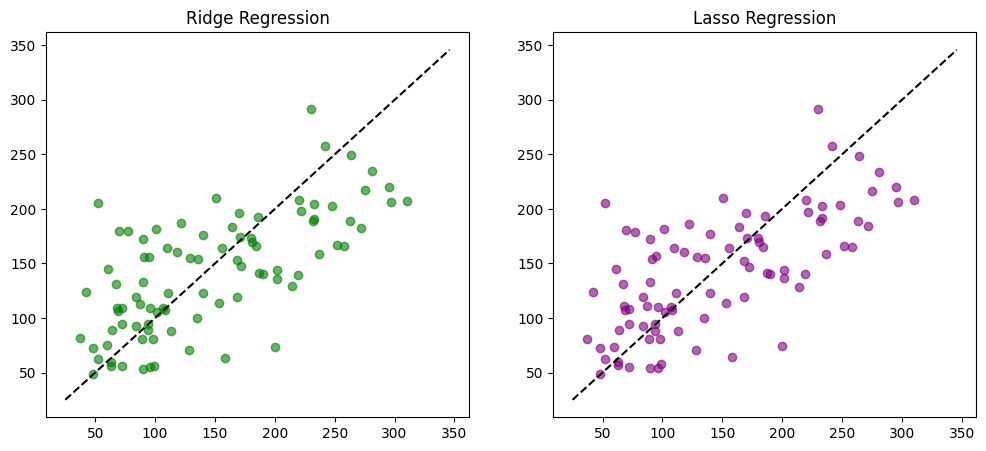

Model Performance Summary:
                Model        MAE       RMSE        R2
0       Simple Linear  52.259976  63.732456  0.233350
1     Multiple Linear  42.794095  53.853446  0.452603
2  Polynomial (deg=2)  52.383912  63.914204  0.228972
3               Ridge  42.811675  53.777599  0.454144
4               Lasso  42.804837  53.708036  0.455555


In [1]:
# Lab 4: Regression Analysis with Regularization Techniques
# Name: [Your Name]
# Course: MSCS 634 - Machine Learning
# Assignment: Lab 4

# -------------------------------
# Step 1: Data Preparation
# -------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name="disease_progression")

# Print dataset info
print("Features shape:", X.shape)
print("Target shape:", y.shape)

# Heatmap to visualize feature correlation
plt.figure(figsize=(10, 6))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# -------------------------------
# Step 2: Simple Linear Regression
# -------------------------------
X_bmi = X[['bmi']]  # Use BMI as the only feature
X_train, X_test, y_train, y_test = train_test_split(X_bmi, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

def evaluate_model(y_true, y_pred, model_name="Model"):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name}:\n MAE = {mae:.2f}, MSE = {mse:.2f}, RMSE = {rmse:.2f}, R² = {r2:.2f}\n")

evaluate_model(y_test, y_pred, "Simple Linear Regression")

# Plot predictions vs actual
plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.plot(X_test, y_pred, color="red", label="Predicted")
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()

# -------------------------------
# Step 3: Multiple Linear Regression
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_multi = LinearRegression()
lr_multi.fit(X_train, y_train)
y_pred_multi = lr_multi.predict(X_test)

evaluate_model(y_test, y_pred_multi, "Multiple Linear Regression")

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_multi)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Multiple Linear Regression")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()

# -------------------------------
# Step 4: Polynomial Regression
# -------------------------------
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_bmi)
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)
y_pred_poly = lr_poly.predict(X_test_poly)

evaluate_model(y_test, y_pred_poly, "Polynomial Regression (Degree 2)")

# Plot polynomial predictions
X_bmi_test = X_test_poly[:, 1]
plt.scatter(X_bmi_test, y_test, color='blue', label='Actual')
plt.scatter(X_bmi_test, y_pred_poly, color='red', alpha=0.6, label='Predicted')
plt.title('Polynomial Regression')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.legend()
plt.show()

# -------------------------------
# Step 5: Ridge and Lasso Regression
# -------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")

# Plot ridge and lasso predictions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_ridge, color='green', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.title("Ridge Regression")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_lasso, color='purple', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.title("Lasso Regression")
plt.show()

# -------------------------------
# Step 6: Model Comparison Summary
# -------------------------------
results = {
    "Model": ["Simple Linear", "Multiple Linear", "Polynomial (deg=2)", "Ridge", "Lasso"],
    "MAE": [
        mean_absolute_error(y_test, y_pred),
        mean_absolute_error(y_test, y_pred_multi),
        mean_absolute_error(y_test, y_pred_poly),
        mean_absolute_error(y_test, y_pred_ridge),
        mean_absolute_error(y_test, y_pred_lasso),
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred)),
        np.sqrt(mean_squared_error(y_test, y_pred_multi)),
        np.sqrt(mean_squared_error(y_test, y_pred_poly)),
        np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
        np.sqrt(mean_squared_error(y_test, y_pred_lasso)),
    ],
    "R2": [
        r2_score(y_test, y_pred),
        r2_score(y_test, y_pred_multi),
        r2_score(y_test, y_pred_poly),
        r2_score(y_test, y_pred_ridge),
        r2_score(y_test, y_pred_lasso),
    ],
}

df_results = pd.DataFrame(results)
print("Model Performance Summary:")
print(df_results)
